# Task 1 - import the libraries and load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('reviews.csv')
df.head()

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
0,games,510,1437,318.0,0.00,81,1.94
1,productivity,155,1547,204.0,-0.50,72,2.07
2,books,273,1162,271.0,0.81,69,1.34
3,games,110,1104,NaN,0.00,82,1.48
4,games,261,1403,224.0,1.01,98,2.80


# Task 2 - Basic data exploration

In [2]:
df.isnull().sum()

Category                   0
No Of Reviews              0
No Of Installs             0
Size                      28
Price                      0
Days since Last Update     0
Rating                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f134a637e50>,
      dtype=object)

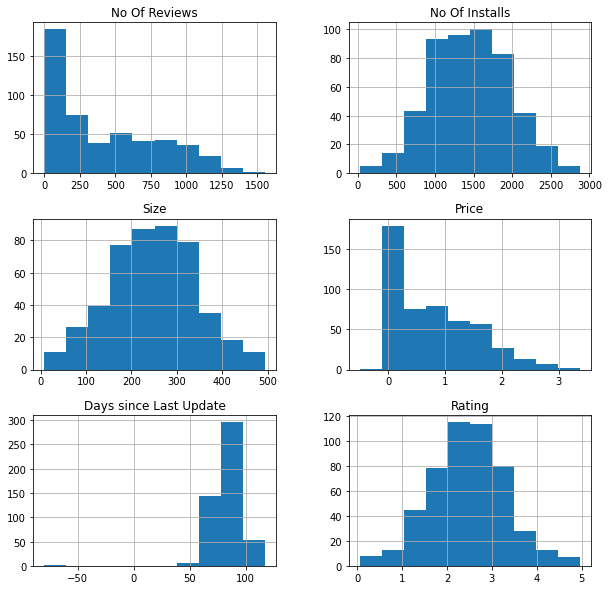

In [3]:
df.hist(figsize=(10, 10))

In [4]:
df.describe()

,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
count,500.000000,500.00000,472.000000,500.000000,500.000000,500.000000
mean,426.578000,1456.22200,247.870763,0.772200,83.274000,2.462260
std,366.600332,506.51664,95.105050,0.752114,14.960433,0.840859
min,0.000000,23.00000,8.000000,-0.500000,-80.000000,0.050000
25%,113.750000,1072.50000,184.000000,0.000000,76.000000,1.907500
50%,273.000000,1447.50000,249.000000,0.645000,84.000000,2.480000
75%,716.250000,1783.75000,312.250000,1.270000,92.000000,3.020000
max,1552.000000,2880.00000,494.000000,3.380000,117.000000,4.970000


# Task 3 - Check for invalid values

In [5]:
cond1 = df['Price'] < 0
df[cond1]

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
1,productivity,155,1547,204.0,-0.5,72,2.07


In [6]:
cond2 = df['Days since Last Update'] < 0
df[cond2]

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
11,productivity,201,2006,NaN,0.00,-68,1.91
88,games,59,587,335.0,1.58,-80,2.08


# Task 4 - Remove invalid rows

In [7]:
cond1 = df['Price'] >= 0
cond2 = df['Days since Last Update'] >= 0
df = df[cond1 & cond2]
df.shape

(497, 7)

# Task 5 - Split data into training and test subsets

In [8]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Task 6 - Check for correlation among features

In [9]:
X_train.corr()

,No Of Reviews,No Of Installs,Size,Price,Days since Last Update
No Of Reviews,1.000000,0.514130,-0.018121,-0.086976,-0.078577
No Of Installs,0.514130,1.000000,-0.004516,-0.018700,-0.054035
Size,-0.018121,-0.004516,1.000000,-0.038070,-0.002414
Price,-0.086976,-0.018700,-0.038070,1.000000,-0.031706
Days since Last Update,-0.078577,-0.054035,-0.002414,-0.031706,1.000000


# Task 7 - Plot scatter plots

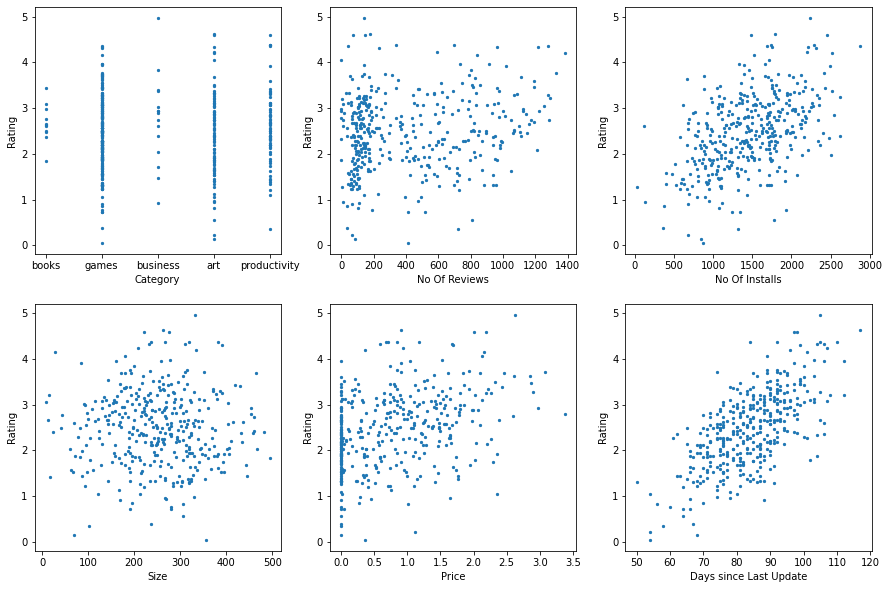

In [10]:
columns = ['Category', 'No Of Reviews', 'No Of Installs', 'Size', 'Price', 'Days since Last Update']

i = 0

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for row in range(0, 2):
  for col in range(0, 3):
    axs[row, col].scatter(X_train[columns[i]], y_train, s = 5)
    axs[row, col].set_xlabel(columns[i])
    axs[row, col].set_ylabel('Rating')
    i += 1


# Task 8 - Data preprocessing

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_col = ['No Of Reviews', 'No Of Installs', 'Size', 'Price', 'Days since Last Update']
cat_col = ['Category']

imp = SimpleImputer(strategy='mean')
tf_num = imp.fit_transform(X_train[num_col])

scaler = StandardScaler()
tf_num = scaler.fit_transform(tf_num)

ohe = OneHotEncoder(sparse = False, drop = 'first')
tf_cat = ohe.fit_transform(X_train[cat_col])

X_train_transformed = np.concatenate((tf_num, tf_cat), axis=1)
print(X_train_transformed[0])


[-1.14922     1.1215984  -1.13561632  0.0732169   0.01224327  1.
  0.          0.          0.        ]


# Task 9 - Train our model

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_transformed, y_train)

print(model.coef_)
print(model.intercept_)

[-0.01263761  0.44527099  0.00512994  0.33109219  0.57813034  0.15265019
 -0.09387284  0.01393827  0.09654561]
2.4437510828137157


# Task 10 - Evaluate the model

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train_transformed)

rmse = mean_squared_error(y_train, y_train_pred, squared = False)
r2 = r2_score(y_train, y_train_pred)

print(rmse)
print(r2)

0.313351772053805
0.8579549928483164


In [14]:
test_tf_num = imp.transform(X_test[num_col])
test_tf_num = scaler.transform(test_tf_num)
test_tf_cat = ohe.transform(X_test[cat_col])

X_test_transformed = np.concatenate((test_tf_num, test_tf_cat), axis=1)

y_test_pred = model.predict(X_test_transformed)

rmse = mean_squared_error(y_test, y_test_pred, squared = False)
r2 = r2_score(y_test, y_test_pred)

print(rmse)
print(r2)

0.2845552987500199
0.8958679954075467


# Task 11 - Use a column transformer and pipeline to simplify our workflow


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_preprocessing = Pipeline(
    [('imp', SimpleImputer(strategy='mean')),
     ('scaler', StandardScaler())])

full_preprocessing = ColumnTransformer(
    [('num', num_preprocessing, num_col),
     ('cat', OneHotEncoder(sparse=False, drop='first'), cat_col)])

final_pipeline = Pipeline(
    [('pre', full_preprocessing),
     ('model', LinearRegression())])


# Task 12 - Train the model using the pipeline

In [16]:
final_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('pre',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imp',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                            

# Task 13 - Evaluate the model

In [17]:
y_train_pred = final_pipeline.predict(X_train)

rmse = mean_squared_error(y_train, y_train_pred, squared=False)
r2 = r2_score(y_train, y_train_pred)

print(rmse)
print(r2)

0.313351772053805
0.8579549928483164


In [18]:
y_test_pred = final_pipeline.predict(X_test)

rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print(rmse)
print(r2)

0.2845552987500199
0.8958679954075467


# Task 14 - Do cross-validation using the pipeline

In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_pipeline, X_train, y_train, cv=4, scoring="neg_root_mean_squared_error")
neg_rmse_cv = scores.mean()
print(-neg_rmse_cv)

scores = cross_val_score(final_pipeline, X_train, y_train, cv=4, scoring="r2")
r2_cv = scores.mean()
print(r2_cv)

0.32508192142610537
0.8409908098104693
